In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [99]:
from functools import reduce

def collapse_sliding_windows(df:pd.DataFrame, overlap:int) -> pd.DataFrame:

    splits = []
    for i in range(overlap):
        splits.append(df.loc[df.patch_i % overlap == i])

    def merger_f(left, right):
        return ('', pd.merge(left[1], right[1],
                         on=["chrom", "start", "end"], suffixes=(left[0], right[0])))

    return reduce(merger_f, zip([f'_{i}' for i in range(1, len(splits))], splits[1:]), ('_0', splits[0]))[1]

In [100]:
data = pd.read_csv('.data/chr10_dlem.tsv', sep='\t')

In [101]:
data

,chrom,start,end,patch_i,max_corr,perc_nan,left,right
0,chr10,0,10000,0,0.410523,0.01,0.950000,1.000000
1,chr10,10000,20000,0,0.410523,0.01,1.000000,0.413690
2,chr10,20000,30000,0,0.410523,0.01,1.000000,0.322455
3,chr10,30000,40000,0,0.410523,0.01,0.404009,0.279908
4,chr10,40000,50000,0,0.410523,0.01,0.046231,0.343523
...,...,...,...,...,...,...,...,...
51995,chr10,132950000,132960000,129,0.499120,0.00,0.955038,0.861187
51996,chr10,132960000,132970000,129,0.499120,0.00,0.847169,0.970317
51997,chr10,132970000,132980000,129,0.499120,0.00,0.866716,1.000000
51998,chr10,132980000,132990000,129,0.499120,0.00,0.938623,1.000000


In [102]:
data_collapsed = collapse_sliding_windows(data, 4)

In [103]:
data_collapsed

,chrom,start,end,patch_i_0,max_corr_0,perc_nan_0,left_0,right_0,patch_i_1,max_corr_1,...,patch_i,max_corr,perc_nan,left,right,patch_i_3,max_corr_3,perc_nan_3,left_3,right_3
0,chr10,3000000,3010000,0,0.410523,0.01,0.687180,0.925764,1,0.513761,...,2,0.55346,0.0,0.782090,0.820697,3,0.575830,0.0,0.950000,0.990256
1,chr10,3010000,3020000,0,0.410523,0.01,0.648392,0.868055,1,0.513761,...,2,0.55346,0.0,0.757368,0.796215,3,0.575830,0.0,0.565005,0.935869
2,chr10,3020000,3030000,0,0.410523,0.01,0.608259,0.897241,1,0.513761,...,2,0.55346,0.0,0.633143,0.863182,3,0.575830,0.0,0.583083,0.999015
3,chr10,3030000,3040000,0,0.410523,0.01,0.567699,0.826008,1,0.513761,...,2,0.55346,0.0,0.569304,0.850589,3,0.575830,0.0,0.559816,0.959313
4,chr10,3040000,3050000,0,0.410523,0.01,0.501719,0.771628,1,0.513761,...,2,0.55346,0.0,0.475512,0.873175,3,0.575830,0.0,0.622402,0.972321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12695,chr10,129950000,129960000,128,0.491649,0.00,0.837999,0.881350,129,0.499120,...,126,0.46366,0.0,0.705383,0.602440,127,0.521863,0.0,0.842367,1.000000
12696,chr10,129960000,129970000,128,0.491649,0.00,0.731188,0.888118,129,0.499120,...,126,0.46366,0.0,0.601615,0.615056,127,0.521863,0.0,0.744410,0.970986
12697,chr10,129970000,129980000,128,0.491649,0.00,0.736544,0.824810,129,0.499120,...,126,0.46366,0.0,0.597102,0.258212,127,0.521863,0.0,0.741151,0.765976
12698,chr10,129980000,129990000,128,0.491649,0.00,0.875733,0.869162,129,0.499120,...,126,0.46366,0.0,0.677449,0.022853,127,0.521863,0.0,0.871741,0.784316


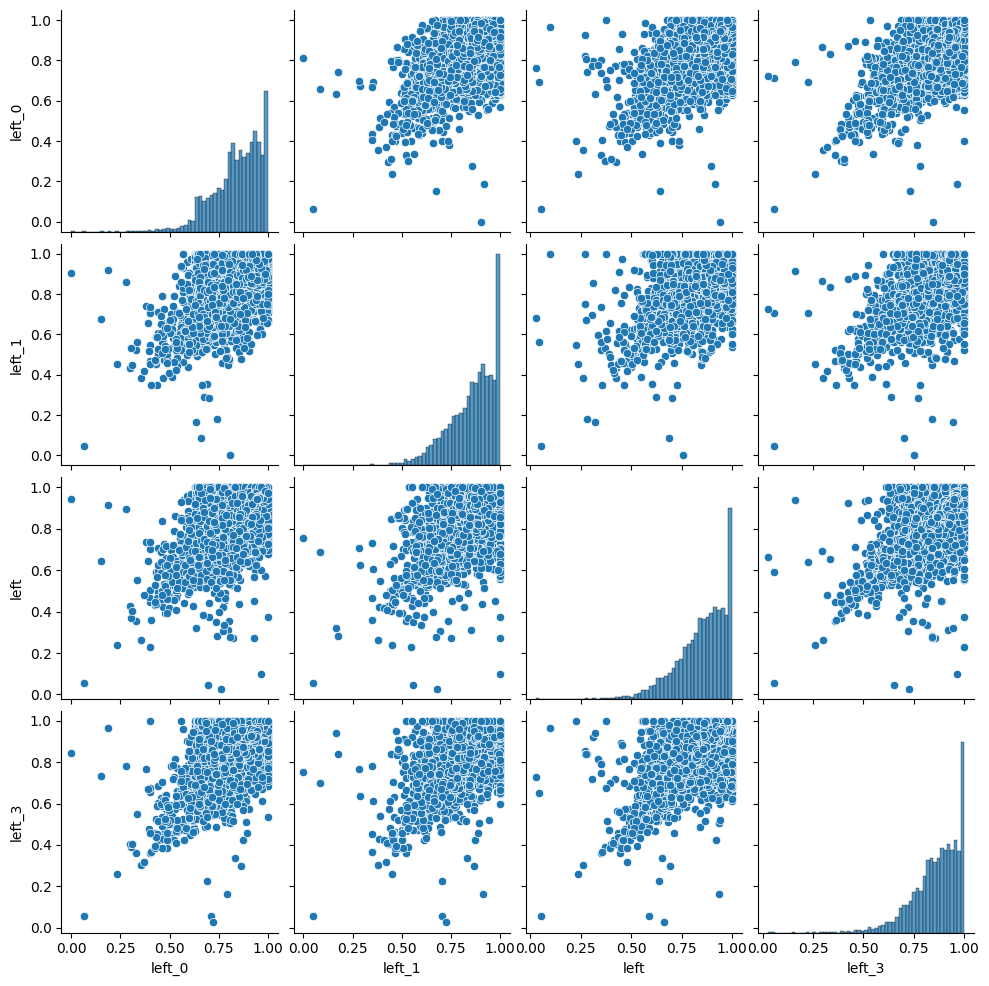

In [124]:
seaborn.pairplot(data_collapsed.loc[data_collapsed.max_corr_0>0.45],
                 vars=list(filter(lambda x: x.startswith('left'), data_collapsed.columns)))

In [125]:
data_collapsed.loc[data_collapsed.max_corr_0>0.45,filter(lambda x: x.startswith('left'), data_collapsed.columns)].corr()

,left_0,left_1,left,left_3
left_0,1.000000,0.560380,0.561393,0.617566
left_1,0.560380,1.000000,0.698743,0.645078
left,0.561393,0.698743,1.000000,0.681007
left_3,0.617566,0.645078,0.681007,1.000000


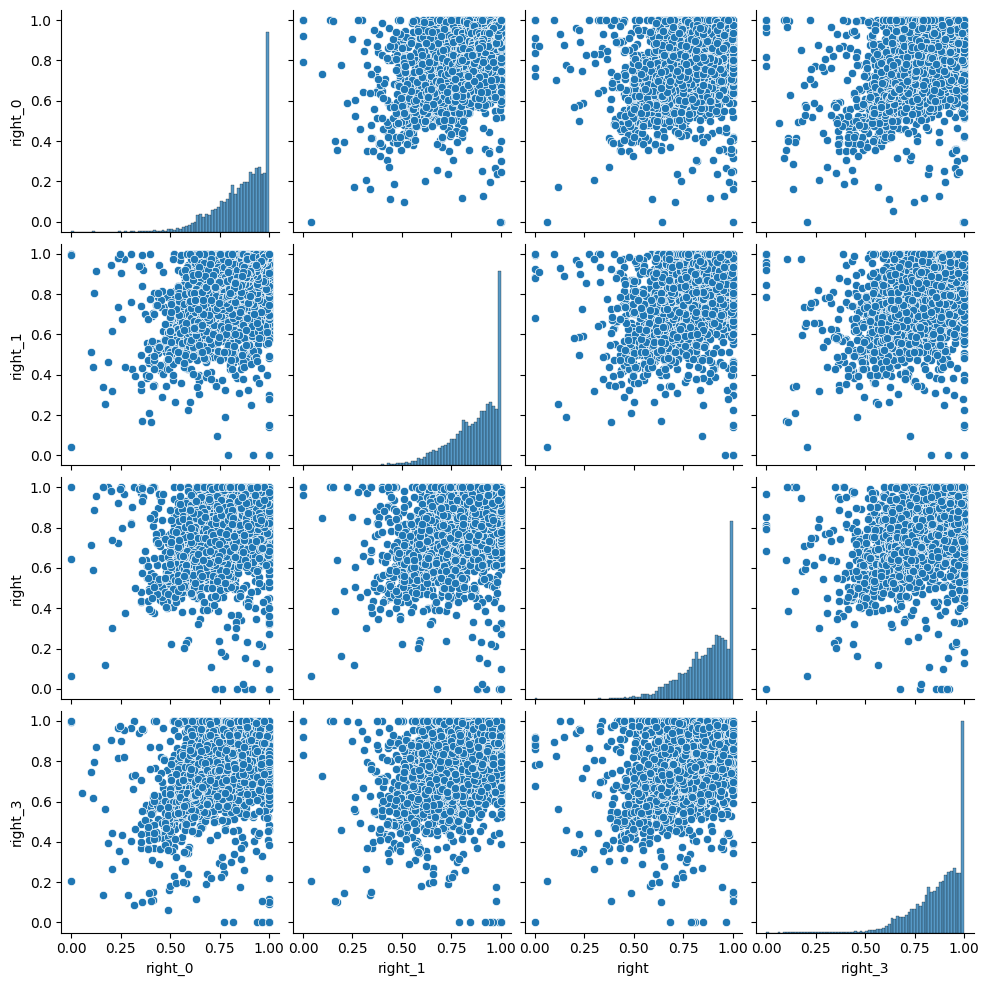

In [127]:
seaborn.pairplot(data_collapsed,
                 vars=list(filter(lambda x: x.startswith('right'), data_collapsed.columns)))

In [128]:
data_collapsed.loc[:,filter(lambda x: x.startswith('right'), data_collapsed.columns)].corr()

,right_0,right_1,right,right_3
right_0,1.000000,0.572933,0.487836,0.554335
right_1,0.572933,1.000000,0.539142,0.517930
right,0.487836,0.539142,1.000000,0.572817
right_3,0.554335,0.517930,0.572817,1.000000


In [119]:
data.groupby().max_corr

0        0.410523
1        0.410523
2        0.410523
3        0.410523
4        0.410523
           ...   
51995    0.499120
51996    0.499120
51997    0.499120
51998    0.499120
51999    0.499120
Name: max_corr, Length: 52000, dtype: float64

In [120]:
max_corr_by_patch = data.groupby('patch_i')['max_corr'].max()

<Axes: xlabel='patch_i'>

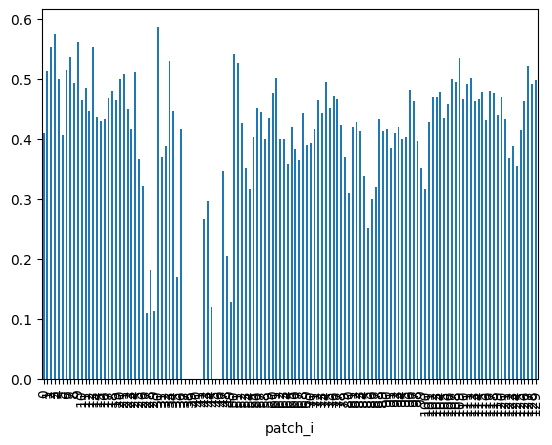

In [123]:
max_corr_by_patch.plot.bar()